<center>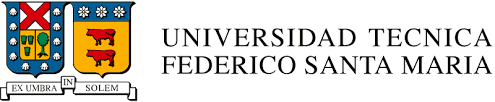</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<hr style="height:2px;border:none"/>

**Integrantes**
* Matías Vargas (Rol 201973036-3)
* Diego Saa (Rol 201973068-1)
* Bruno Liberona (Rol 201973013-4)


**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos.
* Feature Engineering.
* Regresión.
* Clasificación.
* Regularización.
* SVM.


<!-- **Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.   -->

<hr style="height:2px;border:none"/>

# 0. Librerías necesarias.

Librerías a importar para explorar el conjunto de datos y aplicar los modelos de aprendizaje.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC
import random
random.seed(0)

# 1. Demanda de bicicletas compartidas en Seúl: Predicción con Regresión Lineal

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado. Esta intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado variable objetivo o _target_ y, como es un modelo de regresión lineal, esta variable debe ser una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

Para abordar este problema utilizaremos el conjunto de datos disponible en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction. En este dataset se proporcionan datos de alquiler de estas bicicletas, específicamente la cantidad arrendada de estas por hora durante dos años, respecto a diversas variables climáticas y laborales.

El objetivo de nuestra resolución será separar el dataset en conjuntos de entrenamiento y de prueba, con tal de aplicar Regresión Lineal y **predecir el número total de bicicletas alquiladas en el conjunto de prueba.**

## 1.1 Manipulación y exploración del conjunto de datos

<!-- Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2) -->
Primero, se cargarán los datos al Colab con la ayuda de la Api de Kaggle. Para esto, importaremos nuestras Api credentials personales, pudiendo así descargar y descomprimir el dataset en nuestro repositorio virtual.

1) Localizar y subir la api-key de kaggle (kaggle.json):

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"matiasvargas12","key":"5842aa4b9edac462b03cd2f6affe7d10"}'}

2) Otorgar permisos de lectura y escritura al archivo kaggle.json:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

3) Descargar el dataset:

In [ ]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 76.1MB/s]


4) Descomprimir:

In [ ]:
!unzip seoul-bike-sharing-demand-prediction.zip

Archive:  seoul-bike-sharing-demand-prediction.zip
  inflating: SeoulBikeData.csv       


### 1.1.1 Exploración del conjunto de datos

Ya con el dataset almacenado en un .csv dentro del repositorio virtual, se puede almacenar la data dentro de un _dataframe_. Un _dataframe_ es una estructura de datos ofrecida por la librería _pandas_, la cual es muy útil para almacenar conjuntos de datos y realizar diversas operaciones a estos. 

Para crear un _dataframe_ con el archivo .csv obtenido, se ejecuta la siguiente línea de código:

In [ ]:
data = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

Podemos visualizar los primeros 5 ejemplos de este con la siguiente función:

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


De esta manera, ya tenemos almacenado nuestro dataset en un _dataframe_, referenciado por la variable _data_.

Ahora, generaremos la siguiente tabla con la ayuda de _pandas_, la cual nos dará mayor información respecto al _dataset_, como los tipos de sus variables y el estado de los valores de cada una de estas.

In [ ]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Con esto, responderemos las siguientes preguntas:

a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

> Las variables categóricas son: 
* Seasons.
* Holiday.
* Functioning Day.
* Date.

> Esto debido a que corresponden a un tipo de dato el cual se representa a través de texto, poseyendo valores categóricos.

> Por otro lado, las variables númericas son: 
* Rented Bike Count.
* Hour.
* Temperature.
* Humidity.
* Wind speed.
* Visibility.
* Dew point temperature.
* Solar Radiation.
* Rainfall.
* Snowfall.

> Esto debido a que sus variables poseen tipos de datos numéricos (enteros y flotantes de 64 bits).

b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

> Ambas son variables categóricas. Además, ambas posiblemente sean varíables cíclicas, pues representan valores que se repiten cíclicamente a medida que avanza el tiempo lo largo de los dos años que recorre el _dataset_.

c) ¿Faltan valores en el _dataset_?

> No faltan valores, ya que la columna _Non-null_Values_ es igual al tamaño de la muestra en todas las columnas. Además, _Nan_Values_ es 0 en todas las features.

### 1.1.2 Exploración de Features

En tareas de pre procesamiento de los datos, resulta útil explorar cada _feature_ del _dataset_ con tal de estudiar su comportamiento respecto a las frecuencias y tendencias de sus datos.

a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos. Cuente y grafique su histograma.

> Con esto en vista, revisaremos detalladamente las variables 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos. Para comenzar, generaremos un histograma para cada una de estas _features_. El histograma se utiliza para representar la distribución de frecuencia de una variable a lo largo de su dominio.

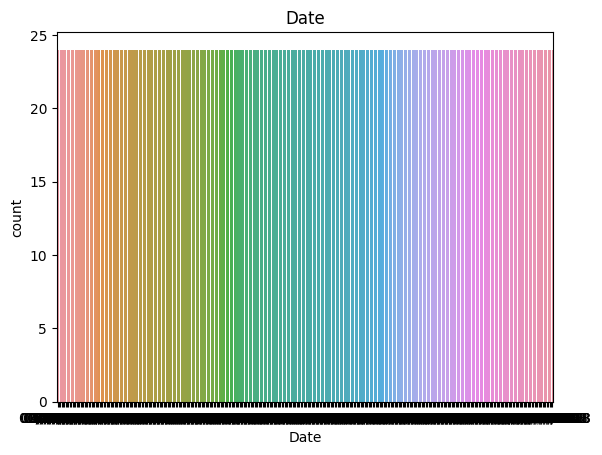

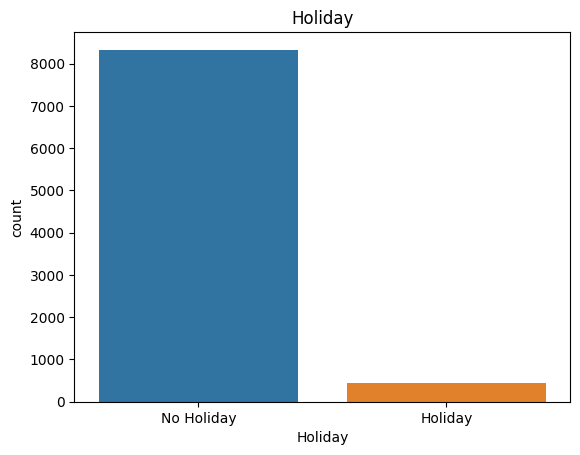

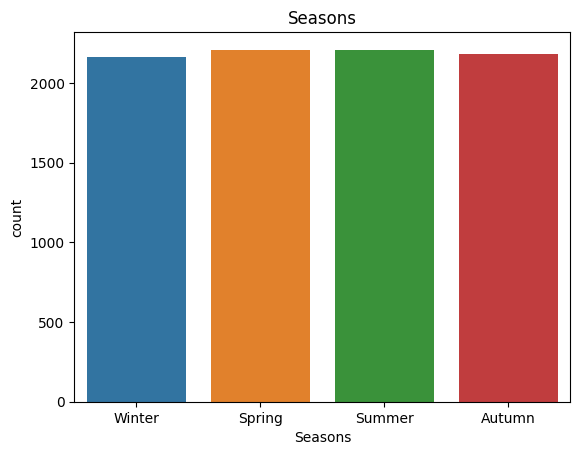

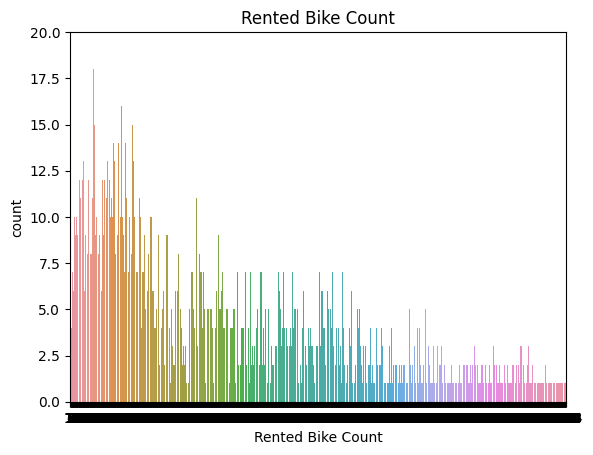

In [ ]:
cat_features = data[['Date', 'Holiday', 'Seasons', 'Rented Bike Count']]

for i in cat_features:
    ax = sns.countplot(data=cat_features, x=i)
    if i == "Rented Bike Count":
        ax.set_ylim([0, 20])
    plt.title(i)
    plt.show()

> Como se puede observar, casi todas estas variables son relativas a la temporalidad del ejemplo. 'Date' representa la fecha de la toma del dato, 'Holiday' hace referencia a si el día es festivo o no, 'Seasons' es la estación del año. En cambio, 'Rented Bike Count' es la cantidad de bicicletas arrendada.

> 'Date' posee un frecuencia de distribución uniforme, lo cual era esperable pues se tiene siempre 24 tomas de datos por día (conforme a las 24 horas del día). 'Seasons' también posee una distribución similar, sujeta a los períodos en que se mantiene cada estación a lo largo del año.

> Respecto a 'Holiday', no tenemos la certeza de si se refiere directamente a los fines de semana presentes en el dataset, o si tambien se consideran festivos junto a estos. Se realizará el siguiente análisis para comprobar esto:

In [ ]:
date = pd.to_datetime(data['Date'], format='%d/%m/%Y')
dayofweek = date.dt.dayofweek

print(f"Cantidad de días 'Holiday': {data['Holiday'][data['Holiday'] == 'Holiday'].count()}")
print(f"Cantidad de días de fin de semana: {dayofweek[dayofweek >= 5].count()}")

Cantidad de días 'Holiday': 432
Cantidad de días de fin de semana: 2496


> Se puede observar que esta variable claramente no cubre a todos los días de fines de semana, por lo que la interpretaremos como días de "vacaciones", debido a festivos u otro tipo de ocasión especial.

b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

> En primer lugar y como ya mencionamos en la pregunta anterior, esta cantidad la veremos representada con la columna 'Holiday'.

> Esta pregunta la abordaremos desde dos perspectivas: desde la cantidad total de bicicletas arrendadas en base a esta variable, y también desde el promedio de bicilcetas.

> Desde la primera perspectiva, se puede graficar lo siguiente, utilizando un gráfico de barras para mejor visualización. Se agrupará los datos respecto a este _feature_ 'Holiday', para luego sumar la cantidad de 'Rented Bike Count', obteniendo una barra para los días de vacaciones ('Holiday') y otra para los días de trabajo ('No Holiday').

Holiday
Holiday        215895
No Holiday    5956419
Name: Rented Bike Count, dtype: int64


<Axes: title={'center': 'Sum of Rented Bike Count by Holiday'}, xlabel='Holidays', ylabel='Rented Bike Count'>

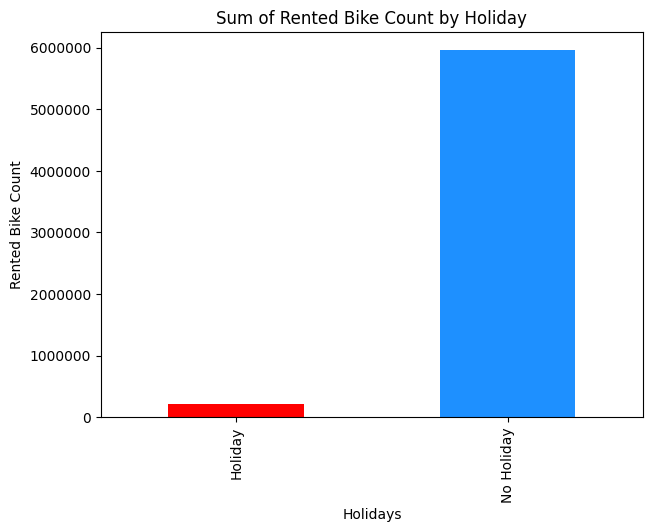

In [ ]:
ax = data.groupby('Holiday')['Rented Bike Count'].sum()
print(ax)

c = ['red', 'dodgerblue']
plt.ticklabel_format(style='plain')
ax.plot(kind='bar', title='Sum of Rented Bike Count by Holiday', ylabel='Rented Bike Count', xlabel='Holidays', figsize=(7, 5), color=c)

> Se puede ver claramente que se arriendan más bicicletas en el total de días de trabajo que en el total de días de vacaciones. Sin embargo y como vimos antes, existen muchos más datos para días de trabajo que para días de vacaciones, por lo que este resultado se ve afectado en gran medida por este factor, aunque de igual manera responde a la pregunta de en que tipo de día se arrienda más bicicletas.

> Por otro lado, podemos graficar de la misma manera utilizando el promedio de la cantidad de bicicletas arrendadas, con tal de analizar esta tendencia a nivel átomico en vez de nivel global.

Holiday
Holiday       499.756944
No Holiday    715.228026
Name: Rented Bike Count, dtype: float64


<Axes: title={'center': 'Average of Rented Bike Count by Holiday'}, xlabel='Holidays', ylabel='Rented Bike Count'>

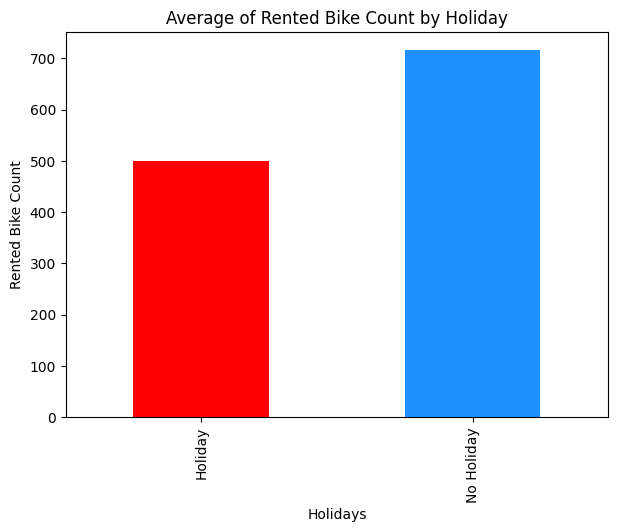

In [ ]:
ax = data.groupby('Holiday')['Rented Bike Count'].mean()
print(ax)

c = ['red', 'dodgerblue']
plt.ticklabel_format(style='plain')
ax.plot(kind='bar', title='Average of Rented Bike Count by Holiday', ylabel='Rented Bike Count', xlabel='Holidays', figsize=(7, 5), color=c)

> De igual manera que lo anterior, se puede ver que se arriendan en promedio más bicicletas en días de trabajo que en días festivos, pero ahora con una diferencia mucho menor que en el caso anterior.

c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

> Para esto, se agruparán nuevamente los datos, pero ahora respecto a un _feature_ nuevo que crearemos para este propósito, al cual llamaremos 'dayofweek'. Este representa el día de la semana de la fecha respectiva en cada ejemplo. Ya con esto, crearemos un gráfico de barras con la suma total de bicicletas arrendadas respecto a cada día de la semana.

dayofweek
Monday       911743
Tuesday      858596
Wednesday    923956
Thursday     861999
Friday       950334
Saturday     885492
Sunday       780194
Name: Rented Bike Count, dtype: int64


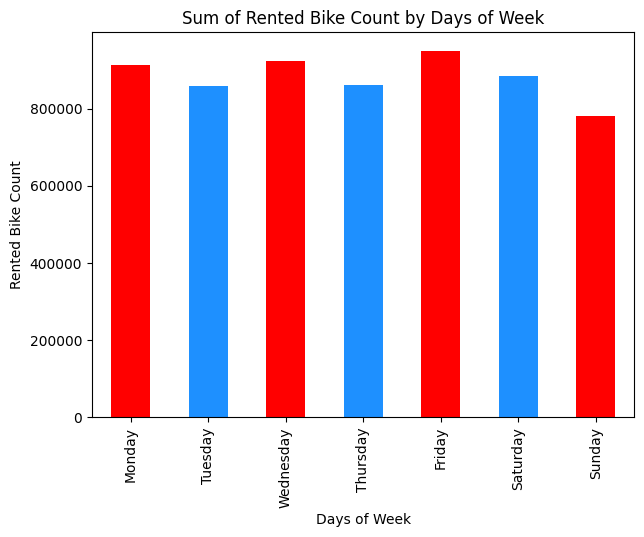

In [ ]:
  # Se establecen estos códigos para mapear los resultados del atributo dt.dayofweek, pues este 
# retorna un valor numérico (Lunes-Domingo => 0-6).
codes = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
order = list(codes.values())

data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['dayofweek'] = data['Date'].dt.dayofweek
data['dayofweek'] = data['dayofweek'].map(codes)

ax = data.groupby('dayofweek')['Rented Bike Count'].sum()
ax = ax.reindex(order)
print(ax)

plt.ticklabel_format(style='plain')
ax.plot(kind='bar', title='Sum of Rented Bike Count by Days of Week', ylabel='Rented Bike Count', xlabel='Days of Week', figsize=(7, 5), color=c)
data.drop('dayofweek', axis=1, inplace=True)


> Del gráfico se puede aprecar de que se arriendan más bicicletas durante los días de semana. De hecho, el domingo es el día que menos se arriendan bicicletas según esta suma. Aún así, se puede notar de que los valores son bastantes similares entre cada día por separado, siguiendo la misma orden de magnitud.

d) ¿De qué forma afecta el clima al arriendo de bicicletas?

> Para esto, analizaremos las _features_ 'Rainfall(mm)', 'Temperature(°C)', 'Wind speed (m/s)' y 'Solar Radiation (MJ/m2)', pues todas estas tienen relación directa con el clima. Para esto, graficaremos todas estas _features_ respecto a la cantidad total de bicicletas arrendadas.

> En primer lugar, analizaremos la distribución de frecuencia de cada una de las columnas ya mencionadas:

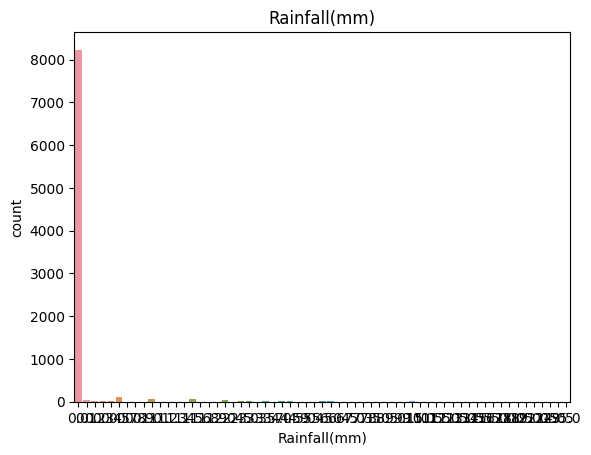

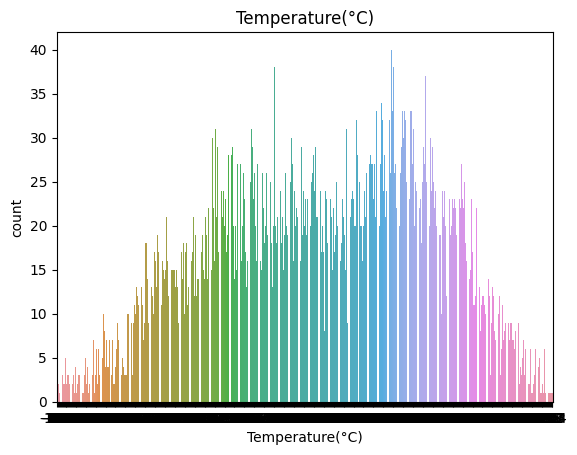

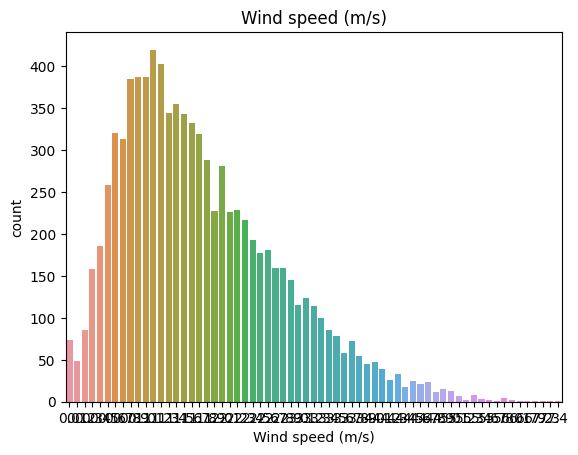

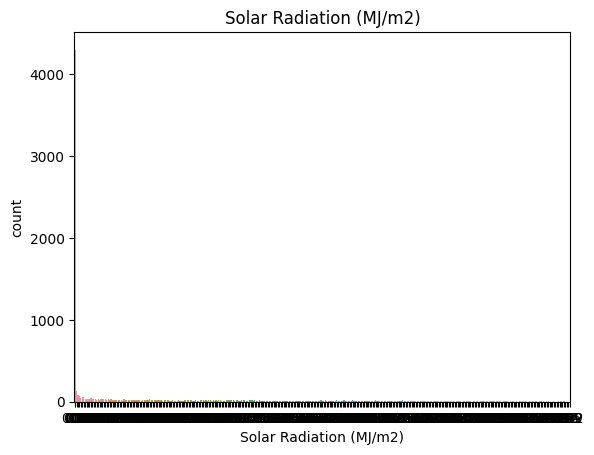

In [ ]:
cat_features = data[['Rainfall(mm)', 'Temperature(°C)', 'Wind speed (m/s)', 'Solar Radiation (MJ/m2)']]

for i in cat_features:
    ax = sns.countplot(data=cat_features, x=i)
    plt.title(i)
    plt.show()

> Como se puede ver, para 'Rainfall(mm)' y 'Solar Radiation (MJ/m2)' existe una distribución de frecuencia muy marcada en los valores más pequeños del eje x, por lo que un gráfico de suma total no entregaría información adecuada. Para resolver esto, graficaremos el promedio respecto a la cantidad de bicicletas arrendadas, entregando un estimador un poco más sensible a esta distribución.

<Axes: title={'center': 'Mean of Rented Bike Count by Rainfall'}, xlabel='Rainfall(mm)', ylabel='Rented Bike Count'>

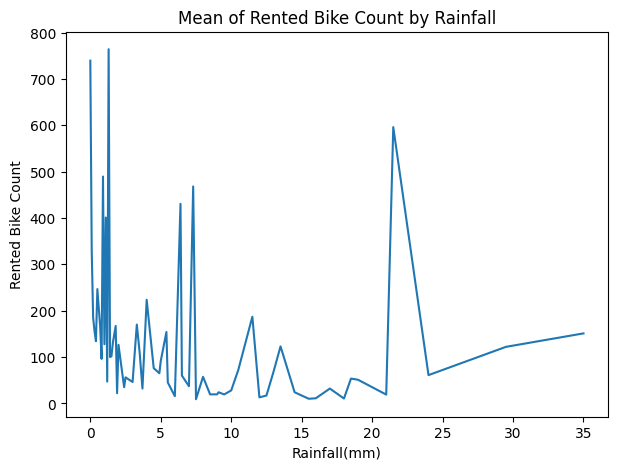

In [ ]:
ax = data.groupby('Rainfall(mm)')['Rented Bike Count'].mean()

c = ['red','dodgerblue']
plt.ticklabel_format(style='plain')
ax.plot(title='Mean of Rented Bike Count by Rainfall', ylabel='Rented Bike Count', xlabel='Rainfall(mm)', figsize=(7, 5))

Temperature(°C)
-17.8     322.0
-17.5     145.5
-17.4      64.0
-16.9      36.0
-16.5      96.0
          ...  
 38.0    1184.0
 38.7     475.0
 39.0    1033.0
 39.3     531.0
 39.4     561.0
Name: Rented Bike Count, Length: 546, dtype: float64


<Axes: title={'center': 'Mean of Rented Bike Count by Temperature'}, xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

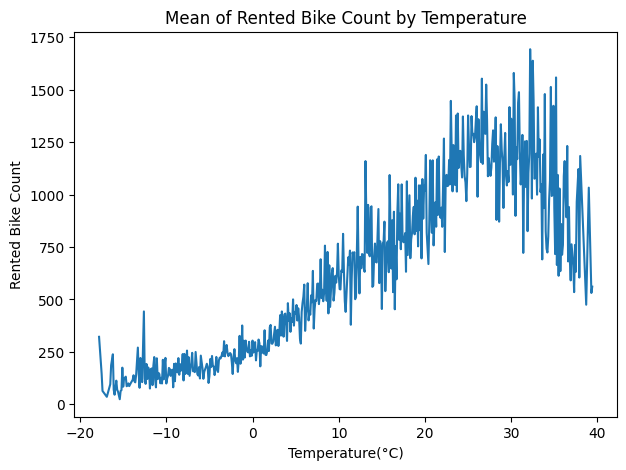

In [ ]:
ax = data.groupby('Temperature(°C)')['Rented Bike Count'].mean()
print(ax)

plt.ticklabel_format(style='plain')
ax.plot(title='Mean of Rented Bike Count by Temperature', ylabel='Rented Bike Count', xlabel='Temperature(°C)', figsize=(7, 5))

Wind speed (m/s)
0.0     448.027027
0.1     591.040816
0.2     498.011628
0.3     454.867089
0.4     470.731183
          ...     
6.7     146.000000
6.9      49.000000
7.2    1805.000000
7.3     133.000000
7.4     913.000000
Name: Rented Bike Count, Length: 65, dtype: float64


<Axes: title={'center': 'Mean of Rented Bike Count by Wind Speed'}, xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

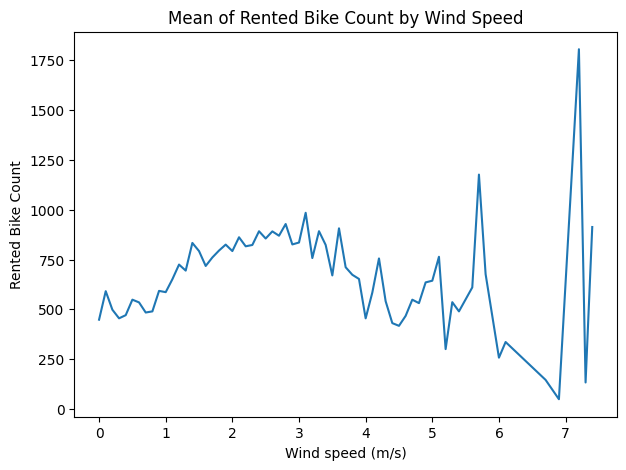

In [ ]:
ax = data.groupby('Wind speed (m/s)')['Rented Bike Count'].mean()
print(ax)

plt.ticklabel_format(style='plain')
ax.plot(title='Mean of Rented Bike Count by Wind Speed', ylabel='Rented Bike Count', xlabel='Wind speed (m/s)', figsize=(7, 5))

<Axes: title={'center': 'Mean of Rented Bike Count by Solar Radiation'}, xlabel='Solar Radiation (MJ/m2)', ylabel='Rented Bike Count'>

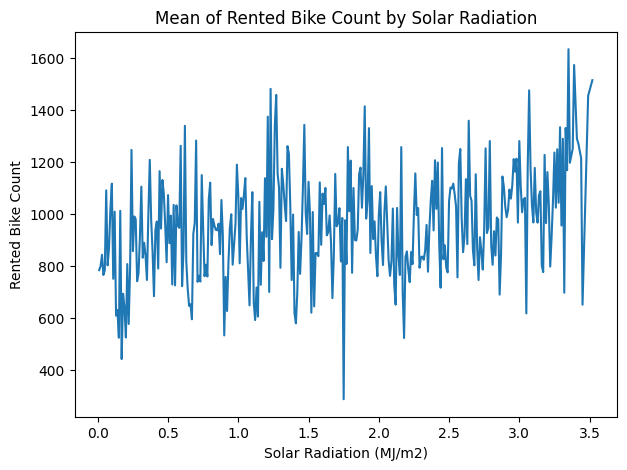

In [ ]:
ax = data.groupby('Solar Radiation (MJ/m2)')['Rented Bike Count'].mean()
ax = ax[0.01:]

plt.ticklabel_format(style='plain')
ax.plot(title='Mean of Rented Bike Count by Solar Radiation', ylabel='Rented Bike Count', xlabel='Solar Radiation (MJ/m2)', figsize=(7, 5))

> Al revisar el gráfico de lluvia, podemos apreciar que la cantidad promedio de bicicletas arrendadas disminuye en cierta medida mientras aumenta la lluvia detectada. Aun así, existen subidas en esta cantidad en niveles de lluvia más altos.

> En el gráfico de temperatura, podemos apreciar que hasta los 25 grados aproximadamente aumenta la cantidad de bicicletas que se arriendan, mientras que pasando esta temperatura la cantidad comienza a disminuir.

> Del gráfico de velocidad del viento, existe una tendencia relativamente normal, exceptuando por datos más altos de velocidad, en donde se pueden ver subidas notables en esta cantidad.

> Finalmente, con el gráfico de radiación solar, no se nota una tendencia muy clara respecto a estas cantidades.

> Según estas observaciones, podemos concluir que la cantidad de bicicletas arrendadas se ve afectada en cierta medida por el clima en ese período de tiempo, pero en ninguno de los casos revisados se puede ver una tendencia lo suficientemente clara. La única variable en la que se puede ver una tendencia relevante es en el caso de la temperatura, en donde el uso de bicicletas se concentra en una temperatura de ambiente promedio, disminuyendo a medida que se aleja de este valor en ambas direcciones.

e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

> Esto lo haremos con la agrupación de los datos respecto al _feature_ 'Seasons', para luego promediar la cantidad de bicicletas arrendadas respecto a cada uno de los valores de esta variable.

Seasons
Autumn     819.597985
Spring     730.031250
Summer    1034.073370
Winter     225.541204
Name: Rented Bike Count, dtype: float64


<Axes: title={'center': 'Average Rented Bike Count by Seasons'}, xlabel='Seasons', ylabel='Rented Bike Count'>

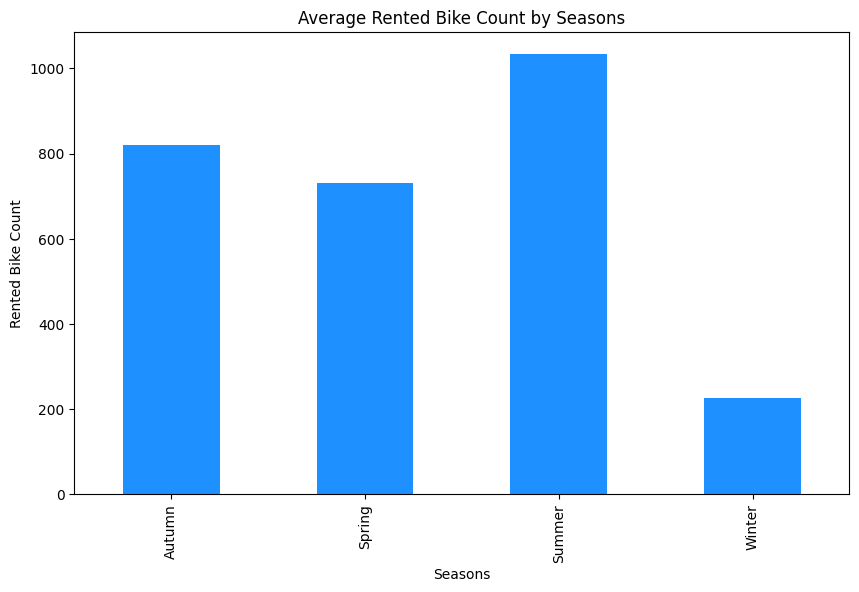

In [ ]:
mean_season = data.groupby("Seasons")['Rented Bike Count'].mean()
print(mean_season)

plt.ticklabel_format(style='plain')
mean_season.plot(kind='bar', title='Average Rented Bike Count by Seasons',
               ylabel='Rented Bike Count', xlabel='Seasons', figsize=(10, 6),color='dodgerblue')

f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

> Verano es la estación en la que más de arriendan bicicletas en promedio. Luego viene otoño, primavera y finalmente invierno.

g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

> Para esto, obtendremos estos tres nuevos _features_ a través de la columna 'Date' y con ayuda de los atributos que posee este objeto.

In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

data.drop('Date', axis=1, inplace=True)

h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

> Una forma de graficar esta correlación es con un mapa de calor. La librería _seaborn_ ofrece la implementación de uno, entregándole la matriz de correlación que se puede obtener con el _dataframe_.

<ipython-input-23-6ca3553f9889>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_corr= data.corr()


<Axes: >

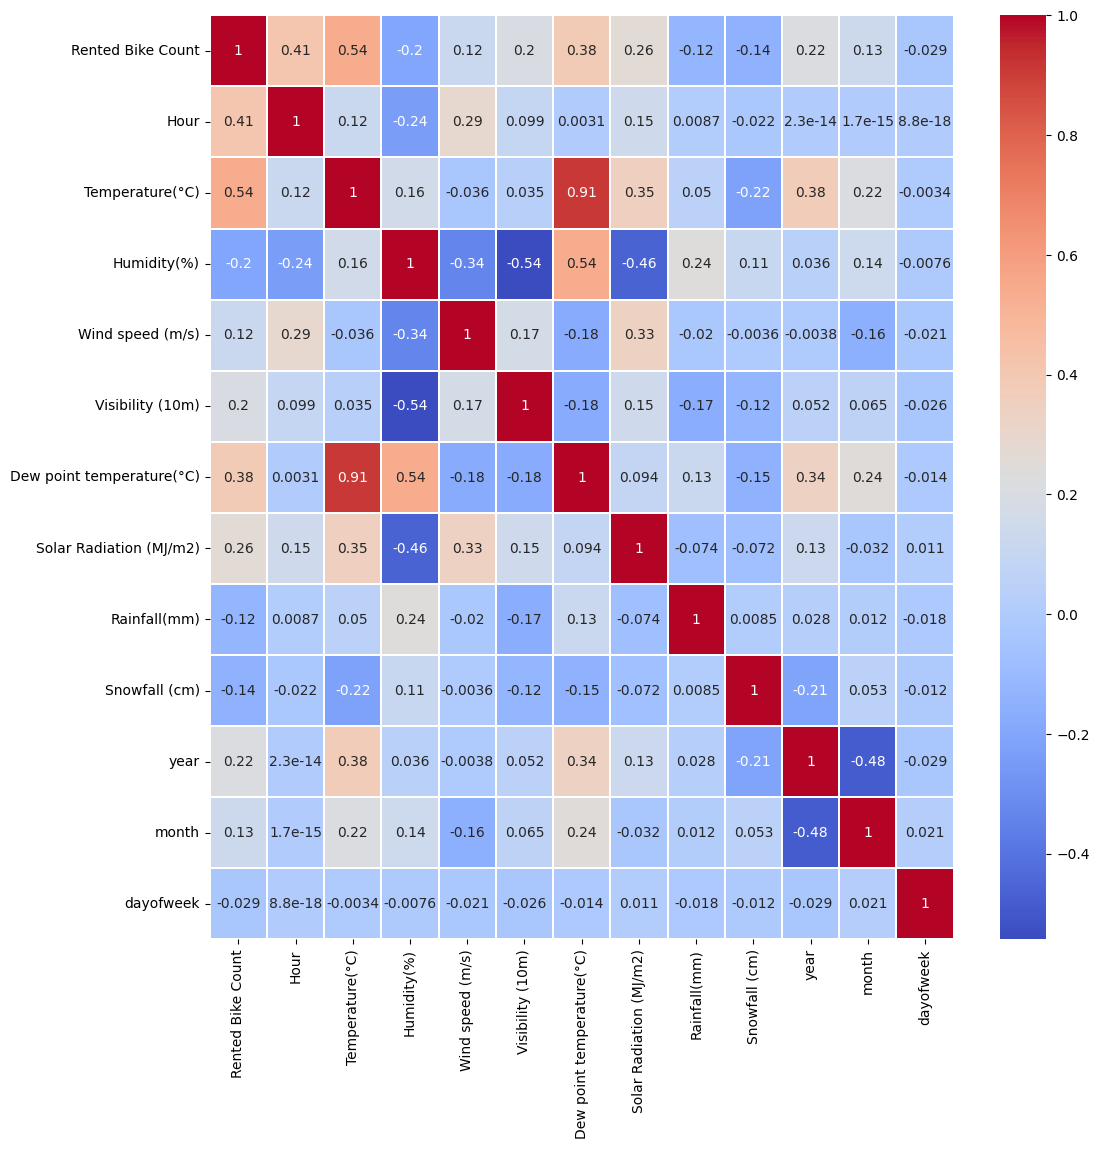

In [ ]:
data_corr= data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h).

> Conocer la correlación entre los diversos _features_ que posee el conjunto de datos respecto a la variable que se quiere predecir puede llegar a ser una información bastante valiosa. Por esto, analizaremos estas correlaciones, las cuales están concentradas en la primera fila o columna. En base a esto, existe una correlación positiva moderada con la feature de temperatura y hora. Con el resto no hay correlación, pues estos índices se encuentran muy lejanos a 1 o -1.

> Esta correlación se podría dar debido a las necesidades de los usuarios de estas bicicletas, pues la temperatura podría afectar el hecho de que el usuario esté en el exterior con tal de utilizar el servicio, como la hora también tiene que ver con los momentos _peaks_ del día en el que existe mayor demanda del servicio.

> Por otra parte, se observan correlaciones esperables y razonables entre las condiciones climáticas, como "dev point temperature"  y "temperature". A pesar de que estas no aporten información directa a la cantidad de bicicletas rentadas, pueden ser útiles para analizar la 

### 1.1.3 Separación de conjuntos

Antes de la aplicación de cualquier modelo de aprendizaje automático, se debe dividir el conjunto de datos en, al menos, uno de entrenamiento y otro de prueba. Se debe tener sumo cuidado con el trato que se hagan a estos sub conjuntos resultantes, pues un mal manejo de estos puede implicar que nuestro modelo este sesgado y no logré predecir ni generalizar adecuadamente.

En base a esto, realizaremos y responderemos lo siguiente:

a) Divida el dataset en features _X_ y target _y_. Además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

> En primer lugar, separaremos el _dataset_ en sus _features_ y en el _target_.

In [ ]:
X = data.drop('Rented Bike Count',axis=1)
y = data['Rented Bike Count']

> Ya con esto listo, podemos aplicar la separación del conjunto en estos dos sub conjuntos. Para esto, utilizaremos el módulo 'train_test_split' de la librería _sklearn_. Este recibe los _features_ y el _target_ separado anteriormente, y retorna los _features_ y _target_ de cada sub conjunto. Además, se le debe indicar el porcentaje de elementos que irán al sub conjunto de prueba. En este caso, lo dejaremos en un 10%.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

b) ¿Para qué es el parámetro stratify?

> Este parámetro se utiliza para mantener la proporcionalidad de las clases de una variable en específico, tanto en el conjunto de entrenamiento como en el de prueba. Esto es útil con tal de evitar posibles sesgos al obtener sub conjuntos muy distintos entre sí respecto a la variable a predecir.

c) Aplique Label Encoding a las variables _Seasons_, _Functioning Day_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

> Label Encoding implica la conversión de variables de tipo categórica a variables de tipo numéricas, asignando a cada categoría de cada variable un valor único. De esta forma, estas variables pueden ser utilizadas en modelos que trabajen únicamente con variables numéricas, como es el caso de la regresión.

> Aplicaremos esta técnica en primer lugar a las variables del conjunto de entrenamiento. Para esto, creamos _LabelEncoder_ distintos para cada variable, y aplicamos el método _fit_transform_ para cada una de estas.

In [ ]:
le_seasons = preprocessing.LabelEncoder()
le_holiday = preprocessing.LabelEncoder()
le_functioning = preprocessing.LabelEncoder()

X_train["Seasons"] = le_seasons.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le_holiday.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = le_functioning.fit_transform(X_train["Functioning Day"])

d) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

> De la misma forma que antes, aplicamos el _LabelEncoder_ a las variables, pero con la diferencia de que ya no es necesario usar _fit_transform_, pues la conversión ya fue aprendida y almacenada en memoria en el paso anterior.

In [ ]:
X_test["Seasons"] = le_seasons.transform(X_test["Seasons"])
X_test["Holiday"] = le_holiday.transform(X_test["Holiday"])
X_test["Functioning Day"] = le_functioning.transform(X_test["Functioning Day"])

e) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?
> Primero se ajusta y aplica la transformación de Label Encoder a los datos de entrenamiento. Luego esta misma transformación es aplicada al conjunto de test.

> Si se aplicara sobre ambos conjuntos, el ajuste de parámetros se podría sesgar con datos del conjunto de prueba, causando posibles problemas en el aprendizaje del modelo con el conjunto de entrenamiento.


## 1.2 Modelos de Regresión

Para predecir nuestro conjunto de prueba, entrenaremos un modelo utilizando Regresión Lineal. El estado actual de nuestro conjunto de datos ya puede ser procesado directamente por un regresor, pues hemos convertido todas las _features_ a variables numéricas. Sin embargo, revisaremos otras formas de pre procesar nuestros datos con tal de encontrar resultados posiblemente mejores que el de un modelo en bruto.

### 1.2.1 Modelo en bruto

Entrenaremos un modelo en bruto, pasando directamente nuestro conjunto de entrenamiento actual al método _LinearRegression_ de la librería _sklearn_.

a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el conjunto de prueba.

> Para esto, simplemente utilizamos el método ya mencionado, llamando el método _fit_ con tal de aplicar una regresión lineal.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*.

> Para esto utilizamos el método _predict_ de la regresión obtenida, pasándole el conjunto de prueba _X_test_. Ya con esto, podemos calcular directamente el error cuadrático medio entre la predicción y los valores reales de cada ejemplo de entrada. Se obtiene lo siguiente:

In [ ]:
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)

179803.75849953017

c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test).

> Generaremos un gráfico de _scatter_ simple para este propósito:

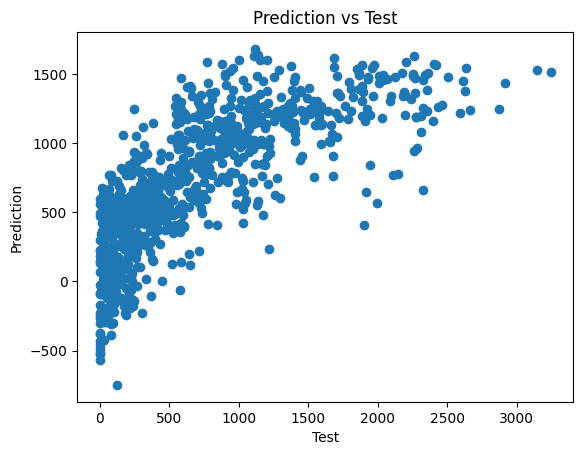

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

> De lo anterior se obtuvo:
* Une error cuadrático medio de 187.027,998.

### 1.2.2 Modelo preprocesado

Como ya se puede haber visto, existen variables cíclicas dentro del conjunto de datos, específicamente por las obtenidas desde _Date_ y _Season_.

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora. En lugar de eso, nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Para modelar este ciclo lo interpretaremos como un _círculo_, utilizando transformaciones de seno y coseno en la fecha con tal de obtener las posiciones de esta en el _círculo_. De esta forma, las 23:00 y las 00:00 son cercanas en esta representación. Con lo anterior, nos quedaríamos con solo 2 columnas.

$var_{cos} = \cos(2π\; var/\text{periodo})$

$var_{sin} = \sin(2π\; var/\text{periodo})$

a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

> Debido a que primero se debe calcular el ángulo que representa la variable dentro de la circunferencia, y es por esto que el valor se multiplica por 2pi y luego se divide en el periodo. Si se calculara directamente el seno o el coseno se obtendría un valor respecto a una división de 360 partes.

> La razón por la que se incluye una columna para el coseno y otra para el seno es porque se necesita la información de estos dos valores con tal de conocer la posición o coordenada que representa cada dato dentro del círculo.

Con esto a sabiendas, podemos aplicar esta transformación a los _features_ 'month', 'Hour' y 'dayofweek', eliminando los _features_ originales de cada sub conjunto:

In [ ]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)
X_train['dayofweek_sin'] = np.sin(2 * np.pi * X_train['dayofweek'] / 7)
X_train['dayofweek_cos'] = np.cos(2 * np.pi * X_train['dayofweek'] / 7)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)
X_test['dayofweek_sin'] = np.sin(2 * np.pi * X_test['dayofweek'] / 7)
X_test['dayofweek_cos'] = np.cos(2 * np.pi * X_test['dayofweek'] / 7)

X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

> El procedimiento es el mismo para este _feature_:

In [ ]:
X_train['Sin_Season'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Cos_Season'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)

X_test['Sin_Season'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Cos_Season'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)

X_train.drop('Seasons', axis=1, inplace=True)
X_test.drop('Seasons', axis=1, inplace=True)

Otro método de pre procesamiento puede ser la normalización de variables. Esta modificación de los datos se suele realizar con tal de mejorar el rendimiento y calidad del modelo obtenido, aunque no se garantiza de que esto se cumpla siempre.

c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.

> Para esto, podemos utilizar un módulo predefinido de _sklearn_ llamado _StandardScaler_. De esta manera, se normalizan todas las variables numéricas que no sean cíclicas.

In [ ]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize])

d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

> Para esto, ejecutamos el mismo código que el que usamos para el modelo en bruto.

In [ ]:
reg = LinearRegression().fit(X_train, y_train)

e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

> Dado que normalizamos obtenemos un _y\_pred_ normalizado al momento de predecir nuestro conjunto de prueba, debemos aplicar la transformación inversa para poder comparar los resultados con los que hay en _y\_test_. Por suerte, esta transformación inversa puede realizarse con la ayuda de _sklearn_ y la misma variable con la que hicimos la transformación.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred)


f) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

170116.07573510034

g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?
> Mejoró el resultado en 1.243,687.

h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test).

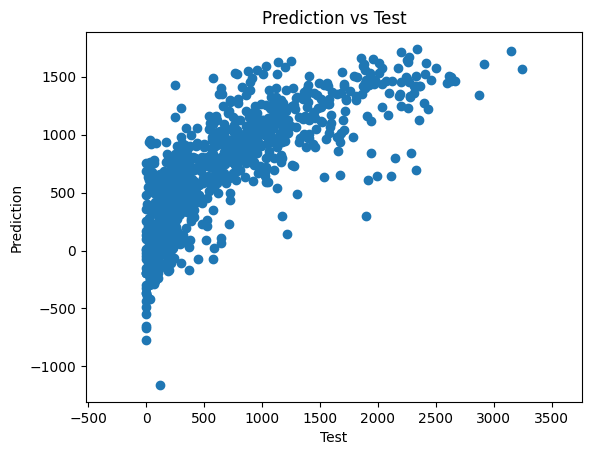

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

> De lo anterior se obtuvo:
* El error fue de 185.784,311.
* Generalmente, el modelo de preprocesado tiene un error cuadrático medio menor al caso anterior, aunque también hubo instancias de ejecución que fueron al revés. Para la última instancia de prueba, este mejoró respecto al modelo en bruto en una cantidad de 1.243,687.

### 1.2.3 Modelo SGD

Ahora, aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello, necesitamos separar una porción del conjunto de entrenamiento en un conjunto de validación, para así obtener un error de validación para el método con ejemplos que no ha visto en su entrenamiento.

a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

> Podemos usar nuevamente el método 'train_test_split', pero ahora solo pasando el conjunto de entrenamiento. Asignaremos un tamaño para el conjunto de validación en un 25% respecto al conjunto de entrenamiento original.

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25)

Ahora, para entrenar el modelo con SGD, utilizaremos la librería _sklearn_ con el método _SGDRegressor_.

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   alpha=0.0001)

Responderemos las siguientes preguntas:

b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

> 1) loss: Define la función de perdida a utilizar.

> 2) penalty: El tipo de regularización que aplicar a los datos.

> 3) tol: Es el criterio de término del algoritmo iterativo. Esto se aplica a través de la condición (loss > best_loss - tol).

> 4) shuffle: Indica si es que los datos deben mezclarse despues de cada iteración.

> 5) warm_start: Sirve para reutilizar la solución de la llamada anterior para que se ajuste como inicialización.

> 7) alpha: Es la tasa de aprendizaje que multiplica a la regularización.

c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

> El hiperparámetro alpha es un factor que multiplica el término de regularización y hace referencia a cuanto queremos penalizar nuestro modelo, disminuyendo la complejidad de la curva de ajuste y asi evitar overfitting. Cuanto más grande es, más fuerte es la regularización, incluso pudiendo llegar a producir underfitting.
<br>
Por otra parte, el learning rate es la cantidad que se actualizan los pesos del SGD durante cada iteración en la fase de entrenamiento. Existen cuatro posibles valores para este learning rate:

>>1) Constant: El learning rate es constante con valor et0 inicial.

>>2) Optimal: El learning rate utiliza el valor del hiperparametro alpha y t0, donde t0 es elegido por una heurística propuesta por Leon Bottou.

>>3) Invscaling: El learning rate utiliza el valor et0 inicial dividido por función exponencial.

>>4) Adaptive: El learning rate comienza con valor et0. Cuado esta fijado el parámetro early_stopping se divide en 5 cuando no hay mejoras durante una cantidad de iteraciones.

Con estas dudas resolvidas, entrenaremos el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Además, graficaremos el error cuadrático medio por _epoch_.

In [ ]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# Entrenando el model utilizando early stoping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # Se detieene después de 10 epochs sin mejora en el error de validación
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # Calcular el error de entrenamiento y validación
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # Ver si es que el error de validación mejoró
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 70 epochs


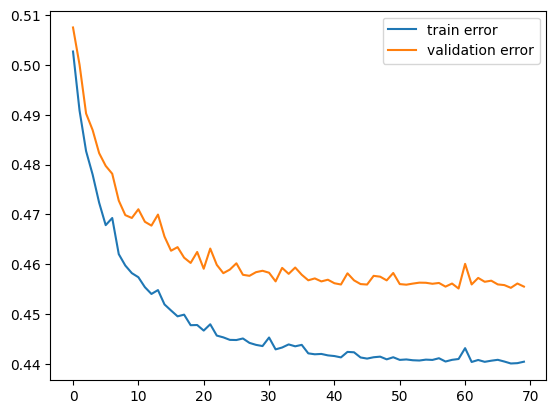

In [ ]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.legend()
plt.show()

Responderemos las siguientes preguntas:

d) ¿Para qué sirve el *early_stoping*?
> Se utiliza para finalizar el entrenamiento cuando la puntuación de validación no mejora al menos una tolerancia establecida durante cierta cantidad de epochs (fijados con el parámetro "n_iter_no_change").



e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

> Es normal que el error de validación sea levemente superior al de entrenamiento, ya que se está entrentando el modelo con los datos de train. sin embargo, al apreciar la diferencia entre los errores y el gráfico podemos observar que el modelo esta underfitting.

f) ¿Cuántas _epochs_ duró su entrenamiento?
> Duró 64 epochs.

g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))


h) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test, y_pred)

170273.40922248174

i) ¿Mejoran los resultados con respecto al modelo anterior?

> Es un valor similar al anterior, sin embargo, el error cuadrático medio del modelo de _SGDRegressor_ fue mayor al de preprocesamiento en 514,648.

j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

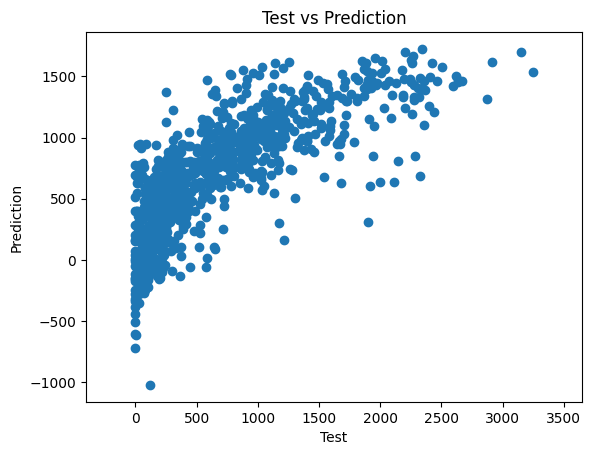

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

> De lo anterior se obtuvo:
* Un error de 186.298,959.
* Este mejoró respecto al modelo en bruto en una cantidad de 729,0385099738487.
* Este empeoró respecto al modelo con preprocesamiento en una cantidad de 514,6484171382617.

## 1.3 Modelo con Regularización

Por último, aplicaremos regresión utilizando regularización con tal de disminuir la complejidad de nuestro modelo, disminuyendo así el riesgo de hacer _overfitting_.

### 1.3.1 Regularización Ridge y Lasso

Para esto, agregaremos regularización Ridge al modelo SGD ya implementado, entrenándolo por 100 _epochs_ como máximo y utilizando early_stoping con una paciencia de 10 _epochs_. Además, graficaremos el error cuadrático medio por _epoch_.

Antes de implementar esto, responderemos las siguientes preguntas:

a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

> Son parámetros que controlan el proceso de aprendizaje y determinan los valores de los parámetros del modelo que empleará el algoritmo de aprendizaje. Esto se puede ver aplicado cuando se utiliza el algoritmo de gradiente descendiente para encontrar los betas que minimizan el error cuadrático medio. También se observa en Lasso y Ridge, para disminuir la complejidad y valores de los parámetros del modelo. Se relaciona con el concepto de hyper tuning, ya que se desea buscar el hyperparámetro que se adapte mejor al modelo de aprendizaje, por ende, hay que realizar pruebas con diferentes valores hasta encontrar el mejor.

b) ¿Cuál es la motivación de agregar una penalización al modelo?

> La finalidad es que no haya overfitting, ya que al agregar penalización se modifica la complejidad del modelo, cambiando los parámetros de la regresión. También, si la penalización es muy grande puede causar underfitting.

c) ¿De qué se compone la penalización mediante regularización Ridge?

> Es λ\*(suma(coeficientes)^2). Donde lambda es el hiperparámetro y los coefientes son los parámetros del modelo.

d) ¿Cómo funciona la regularización Lasso?

> Es similiar a Ridge, sin embargo, la penalización es: λ\*|suma(coeficientes)|.

e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

> Una ventaja de Lasso sobre Ridge se basa al momento de aumentar el valor del hyperparámetro, ya que los coeficientes del modelo pueden llegar a valer 0, lo que permite eliminar features. Por otra parte, en Ridge los coeficiente son asintóticos a 0, por lo que no se llegan a eliminar.

> Una ventaja de Ridge sobre Lasso se basa en que no es tan sensible al aumento de valor del hyperparámetro, mientras que Lasso puede eliminar features con valores de lamda no tan grandes y producir underfitting.

f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.

> Para realizar estas tres tareas, primero se instanciará el _K-fold cross validation_ que se utilizará dentro del _GridSearchCV_. Esta se instanciará con _k_ igual a 5 y con _shuffle_ antes de separar los datos.

<!-- > **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento. -->

In [ ]:
k = 5
cv_folds = KFold(n_splits=k, shuffle=True)

> También se debe definir el modelo que se ajustará dentro de _GridSearchCV_, que en este caso será el _SGDRegressor_ del ítem anterior. 

In [ ]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25,
                   early_stopping=True,
                   n_iter_no_change = 10
                   )

> Se define la variable _param_grid_ como los diferentes parámetros de _SGDRegressor_ que se utilizaran para hacer tunning. La finalidad de GridSearchCV es probar diversas combinaciones con los parámetros de  _SGDRegressor_, hasta encotrar los  que mejor se ajusten a nuestro modelo, mediante una puntuación del error cuadrático medio.

In [ ]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

> Se realiza el ajuste de los parámetros mencionados anteriormente con el conjunto de entrenamiento.

In [ ]:
hypereg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(early_stopping=True, max_iter=100,
                                    n_iter_no_change=10),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

i) Obtenga los resultados para cada hiperparámetro de la grilla.

In [ ]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.083326,0.015039,0.007982,0.001100,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-1.869521e+24,-6.077783e+23,-1.187967e+23,-5.526292e+22,-3.028875e+23,-5.908492e+23,6.675171e+23,53
1,0.179708,0.058044,0.007475,0.003201,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.118536e+23,-1.765537e+23,-3.967186e+23,-3.377717e+24,-4.510857e+22,-8.815903e+23,1.255642e+24,54
2,0.197793,0.142377,0.004158,0.002649,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-5.343840e-01,-1.633790e+22,-8.491714e+23,-5.751901e-01,-2.488821e+01,-1.731019e+23,3.380940e+23,48
3,0.231370,0.070822,0.002716,0.000055,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-9.762997e+12,-4.917119e-01,-4.686806e-01,-6.312443e-01,-6.163372e+21,-1.232674e+21,2.465349e+21,46
4,0.049931,0.013003,0.002796,0.000142,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.357507e-01,-4.607098e-01,-4.638274e-01,-4.849997e-01,-5.182165e-01,-4.727008e-01,2.760713e-02,17
5,0.066708,0.019225,0.002719,0.000055,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.309693e-01,-4.450758e-01,-4.544556e-01,-4.579283e-01,-5.203366e-01,-4.617531e-01,3.074309e-02,10
6,0.043575,0.012210,0.003820,0.002189,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.830246e-01,-4.905096e-01,-4.712602e-01,-4.989852e-01,-5.280242e-01,-4.943608e-01,1.913943e-02,23
7,0.065103,0.019761,0.003016,0.000440,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.483823e-01,-4.562397e-01,-4.791479e-01,-4.507246e-01,-5.273872e-01,-4.723763e-01,2.958699e-02,16
8,0.124873,0.059126,0.002723,0.000071,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-9.295666e+18,-1.076363e+24,-5.250605e-01,-6.624619e-01,-1.704571e+15,-2.152745e+23,4.305443e+23,49
9,0.211225,0.066269,0.004963,0.004191,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.139137e-01,-1.861182e+20,-2.573598e+21,-4.940709e-01,-1.036934e+18,-5.521507e+20,1.013282e+21,45


j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [ ]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

k) Calcule el error cuadrático medio en la escala original de bicicletas

In [ ]:
mean_squared_error(y_test,y_pred)

170584.2294070169

l) ¿Mejoran los resultados con respecto a los modelo anteriores?

> Sí bien el error cuadrático medio es menor a los modelos anteriores, la diferencia no es muy significativa.

m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

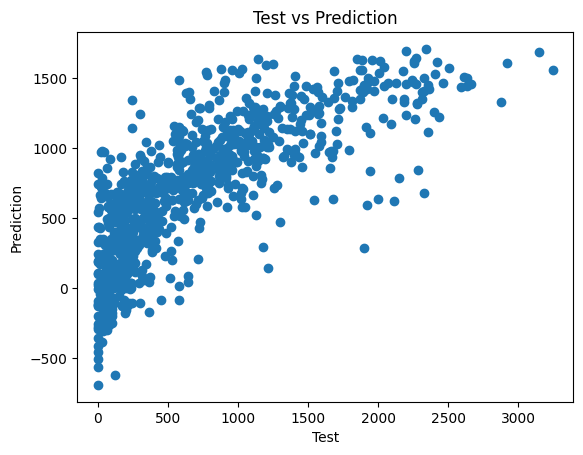

In [ ]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.4 Conclusiones:

> Si conderamos los siguientes errores cuadráticos medio (MSE) de una ejecución del notebook:


> - Modelo Bruto: 	      187.027,997
- Modelo Preprocesado:    185.784,311
- Gradiente Descendiente: 186.298,959
- Regularización Ridge:   186.087,970

> Observando los resultados, si bien las diferencias no son muy significativas, en cuanto a regresión lineal, el modelo preprocesado tiene un MSE menor que el modelo bruto. Adicionalmente, si consideramos el SGR y la Regularización Ridge, se puede notar que la Regularización de Ridge es la que tiene el menor MSE, siendo la que puede realizar prediciones más precisas sobre nuevos datos. Sin embargo, si bien se usa el MSE para comparar modelos, también se podrían utilizar otras métricas. Por otra parte, el gráfico de error de validación y entrenamiento nos ayudo a visualizar que el modelo estaba underfitting, por lo que la regularización posterior podría generar peores resultados.

> Es importante destacar que con nuestra predicción se sigue obteniendo un error relativamente alto, esto evidenciándose en los gráficos de 'Predicción vs. Test' de cada implementación. Sin embargo, es probable que esto se deba a la naturaleza de los datos con los que estamos trabajando.

> De esto, nos quedamos principalmente en que el preprocesamiento de datos y técnicas como el Gradiente Descendiente y la regularización son útiles con tal de obtener modelos con mejor desempeño que uno con datos en bruto, disminuyendo el error asociado a las predicciones y aumentando la capacidad de generalización del modelo final.

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para lograr esto, se debe utilizar un algoritmo de clasificación que examina las características de cada ejemplo en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

Nuevamente usando la Api Key de Kaggle, descargaremos el _dataset_ ya mencionado, almacenándolo en un _dataframe_ de _pandas_.

1) Se descarga el _dataset_.

In [ ]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 56.1MB/s]


2) Se descomprime el .zip.

In [ ]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


3) Se almacena el _dataset_ en un _dataframe_ _df_.

In [ ]:
df = pd.read_csv('/content/mushrooms.csv')

Ya con esto, aplicaremos el mismo análsis inicial, revisando las primeras 5 filas y las características generales de los _features_ del _dataset_.

In [ ]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

> Podemos visualizar la distribución de frecuencias de esta variable a través de un histograma, con el siguiente bloque de código:

<Axes: xlabel='veil-type', ylabel='count'>

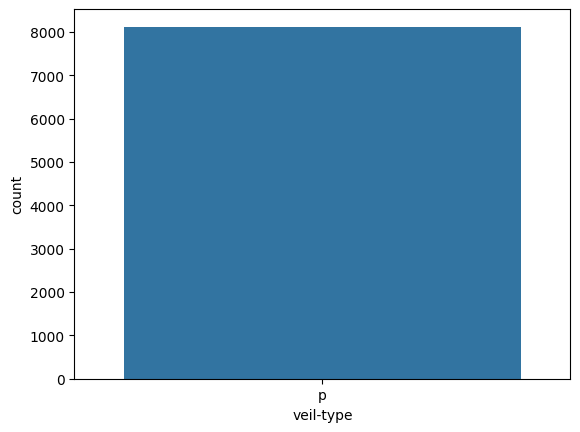

In [ ]:
sns.countplot(x="veil-type", data=df)

> Como podemos ver, esta variable solo tiene valores de tipo _p_, por lo que está no aporta información al modelo. Dado esto, podemos eliminarla con el siguiente código:

In [ ]:
df.drop('veil-type', axis=1, inplace=True)

b) Grafique la distribución de cada variable.

> Para esto, graficaremos un histograma para cada una de las variables del _dataframe_:

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


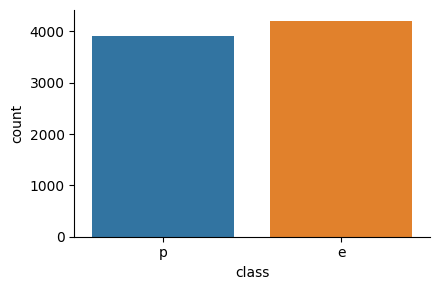

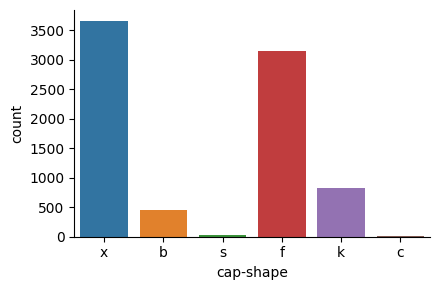

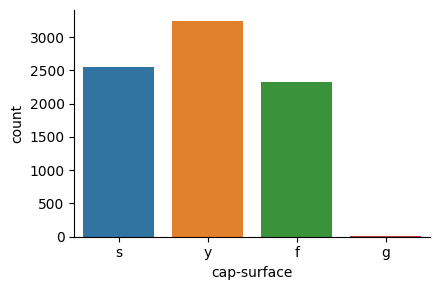

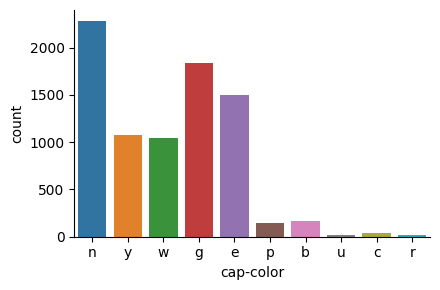

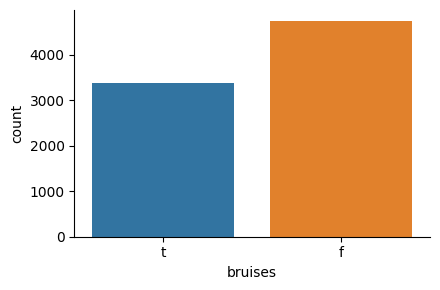

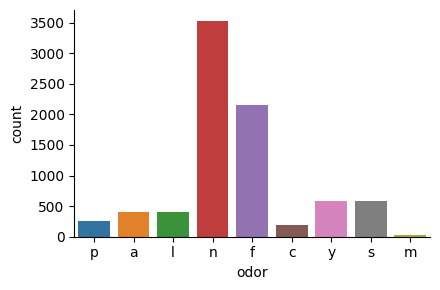

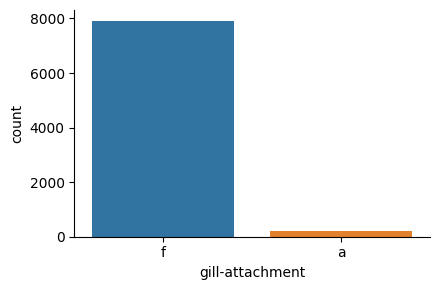

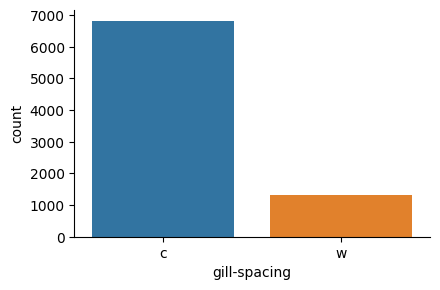

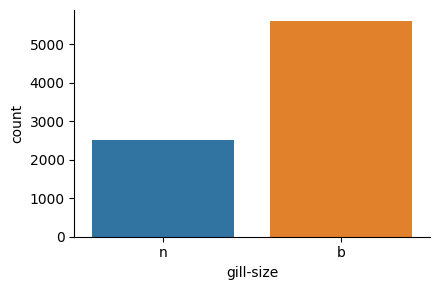

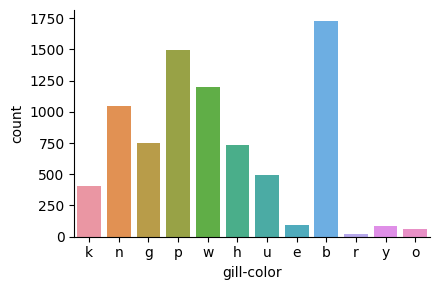

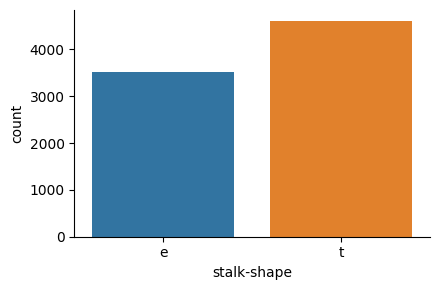

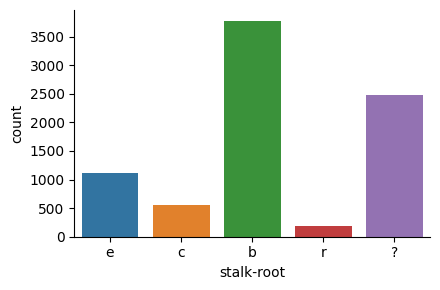

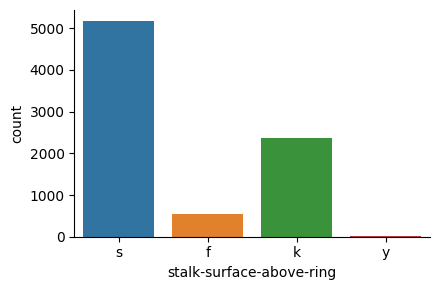

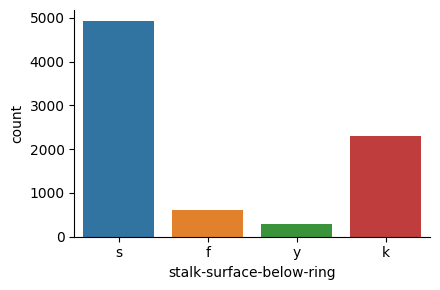

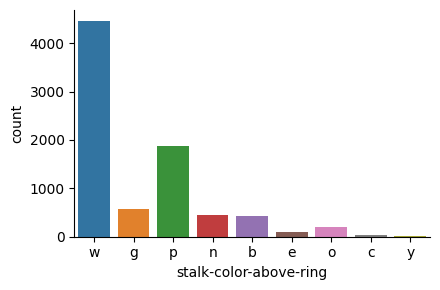

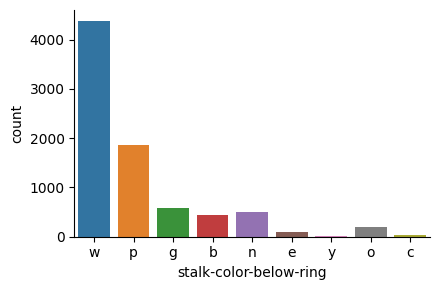

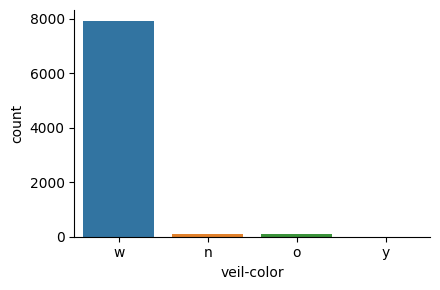

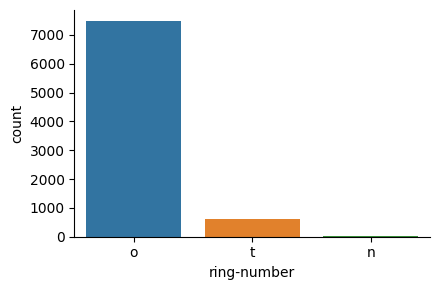

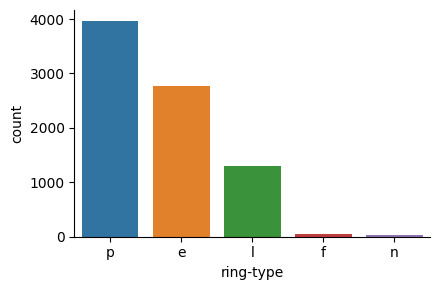

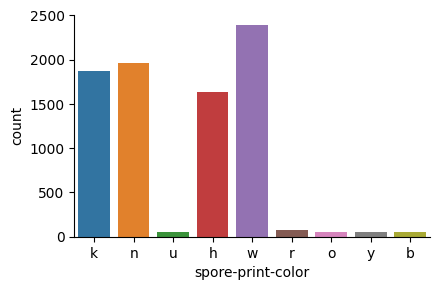

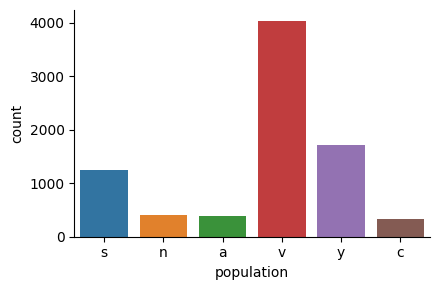

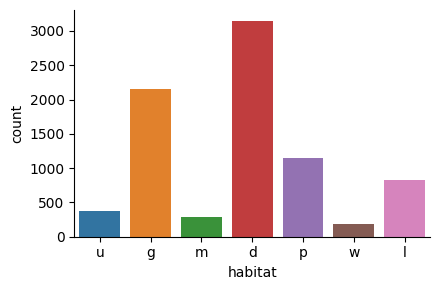

In [ ]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

e) Separe los subconjuntos en _X_ e _y_.

> Para abordar estos tres ítems, se implementará el siguiente bloque de código. En primer lugar, se separará el conjunto de datos en el conjunto de entrenamiento y de prueba con el uso de _df.sample()_. El primero tendrá un 70% de los datos, mientras que el segundo tendrá un 30%. Luego, se iterarán todas las variables de cada conjunto y se le realizará una transformación respecto a si es binaria o no:
* Si es binaria, la columna se transforma utilizando _factorize()_ de _pandas_, la cual asigna una variable numérica única para cada valor posible de los datos. Como son variables binarias, estos valores serán 0 y 1.
* En caso contrario, se utiliza el método _get\_dummies()_ para generar una columna nueva por cada valor distinto de una categoría. Estas nuevas columnas tendrán valores binarios, los cuales dependerán de los valores de la columna original.
Por último, las columnas antiguas se eliminarán y las nuevas se agregarán al _dataframe_.

In [ ]:
# Separar en conjuntos de entrenamiento y prueba
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

# Lista con las columnas que se eliminarán
drop_cols = []

# Iterar por columnas
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # Convertir variables binarias en 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # Crear variables categóricas dummy para columnas con más de 2 categorías
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # Añadir la columna original a ser eliminada
        drop_cols.append(col)

# Eliminar las columnas del conjunto de entrenamiento y de prueba
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# Nos aseguramos de que ambos conjuntos tengan los mismas columnas
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)


print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

Train set shape: (5687, 112)
Test set shape: (2437, 112)


In [ ]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']

X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning con tal de reducir el número de características en el conjunto de datos, conservando así la información más importante.

a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

> Se crean dos listas para el conjunto de entrenamiento y test, guardando los resultados de PCA para los tres valores de _n\_components_. Al interior del ciclo se aplica PCA y se obtienen las componentes resultantes, luego se ajusta esta transformación al conjunto de test y entrenamiento.

In [ ]:
X_train_pca = []
X_test_pca = []
k = 1,10,50
row, n_features = X_train.shape
for i in k:
  pca = PCA(n_components=n_features - i)
  pca.fit(X_train)

  X_train_new = pca.transform(X_train)
  X_test_new = pca.transform(X_test)
  
  X_train_pca.append(X_train_new)
  X_test_pca.append(X_test_new)


### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.





a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.

> Para esto, utilizaremos el método 'mutual_info_classif' de _sklearn_. Este método se utiliza para calcular la importancia de cada _feature_ con respecto al _target_ utilizando información mutua.

In [ ]:
mi = mutual_info_classif(X_train, y_train)

b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".

> Se crean dos listas para guardar el conjunto de entrenamiento y test resultantes de las features con mayor puntuación _mi_, para los diferentes valores de la variable k. Dentro del ciclo for se eliminan las columnas con menor score _mi_ (len(mi) - k), obteniendo los indices de estas features y descartándolas de los conjuntos _X\_train_  y _X\_test_.

In [ ]:
# Se setea con k el número de features que se excluirán
k = 1, 10, 50
X_train_mi = []
X_test_mi = []
for i in k:
  # Número de features a elegir
  n = len(mi) - i

  # Sort de los features respecto a su mi score
  sorted_indices = np.argsort(mi)

  # Se eligen las mejores n
  selected_indices = sorted_indices[-n:]

  # Se eliminan las peores features y se mantienen las mejores n
  no_selected_indices = (sorted_indices[:-n]).tolist()
  X_train_new = X_train.drop(X_train.columns[no_selected_indices], axis=1)
  X_test_new = X_test.drop(X_test.columns[no_selected_indices], axis=1)
  X_train_mi.append(X_train_new)
  X_test_mi.append(X_test_new)


## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, se puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

De esta manera, utilizaremos la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuencia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

> * Debido a que solo hay dos clases después de aplicar one hot encoder, se podría considerar una distribución binomial para las variables.
* Considerando los valores antes de aplicar one hot encoder, se podría considerar una distribución multinomial.

b) Entrene el clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.

c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

> Para responder estas dos preguntas, consideraremos que los datos siguen una distribución de probabilidad Gaussiana, por lo que entrenaremos el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> En el siguiente código se entrenan los modelos utilizando este método los datos en bruto y los resultantes al aplicar _PCA_ y _MI_. Finalmente, todos los modelos se guardan en una lista.

In [ ]:
# Lista de modelos
y_pred_models = []

# Entrenar modelo con datos en bruto
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_models.append(y_pred)

# Entrenar modelo para los datos resultantes de PCA
for i in range(len(X_train_pca)):
  clf = GaussianNB()
  clf.fit(X_train_pca[i], y_train)
  y_pred = clf.predict(X_test_pca[i])
  y_pred_models.append(y_pred)

# Entrenar modelo para los datos resultantes de MI
for i in range(len(X_train_mi)):
  clf = GaussianNB()
  clf.fit(X_train_mi[i], y_train)
  y_pred = clf.predict(X_test_mi[i])
  y_pred_models.append(y_pred)

d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

>Se realiza el reporte de clasificación para el modelo bruto:

In [ ]:
# Modelo base
print(classification_report(y_test, y_pred_models[0], target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      0.97      0.99      1303
   poisonous       0.97      1.00      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.99      0.98      2437
weighted avg       0.98      0.98      0.98      2437



> Se realiza el reporte de clasificación para los modelos resultantes de PCA:


In [ ]:
# Modelo PCA 1-10-50
print("pca 1")
print(classification_report(y_test, y_pred_models[1],target_names=['edible', 'poisonous']))
print("\n")
print("pca 10")
print(classification_report(y_test, y_pred_models[2],target_names=['edible', 'poisonous']))
print("\n")
print("pca 50")
print(classification_report(y_test, y_pred_models[3],target_names=['edible', 'poisonous']))

pca 1
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437



pca 10
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437



pca 50
              precision    recall  f1-score   support

      edible       0.89      0.97      0.93      1303
   poisonous       0.96      0.87      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.92      0.92      2437
weighted avg       0.92      0.92      0.92      2

> Se realiza el reporte de clasificación para los modelos resultantes de MI:

In [ ]:
# Modelo MI 1-10-50
print("mi 1")
print(classification_report(y_test, y_pred_models[4],target_names=['edible', 'poisonous']))
print("\n")
print("mi 10")
print(classification_report(y_test, y_pred_models[5],target_names=['edible', 'poisonous']))
print("\n")
print("mi 50")
print(classification_report(y_test, y_pred_models[6],target_names=['edible', 'poisonous']))

mi 1
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99      1303
   poisonous       0.99      1.00      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437



mi 10
              precision    recall  f1-score   support

      edible       1.00      0.99      1.00      1303
   poisonous       0.99      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



mi 50
              precision    recall  f1-score   support

      edible       0.98      1.00      0.99      1303
   poisonous       1.00      0.98      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437

e) Determine la mejor representación de los datos según las métricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

Dentro de las métricas que consideramos más importante fue considerar tanto el valor del recall  y f1 score. La primera métrica, consideramos que es el más importante, ya que es crítico si se clasifica un hongo venoso como comestible. La segunda, nos permite considerar tanto el recall como el precision y este último nos ayuda saber si el modelo está reconociendo correctamente las clases. Finalmente, no consideramos el accuracy de primeras como una buena medida, esta fue considerada despues de ver las anteriores, ya que pueden haber una alta frecuencia de prediciones comestibles cuando el hongo es venoso y aun asi tener un accuracy alto.

> En el caso del modelo bruto, entrega buenos resultados haciendo uso de la información de todas las features. Para la clase venenosa, se obtiene un recall de 1.00 y f1-score de 0.98. Para la clase comestible, se obtiene un recall de 0.97 y f1-score de 0.99.

> En el caso del modelo utilizando _PCA_, el mejor resultado se logro con 61 componentes. Para la clase comestible se obtuvo recall de 0.97 y f1 score de 0.93. Para la clase comestive se obtuvo un recall de 0.96 y f1 score de 0.87.
 
> En el caso del modelo utilizando _MI_, el mejor resultado se logro eligiendo las 101 features con mayor _MI_. Para la clase comestible se obtuvo recall de 0.99 y f1 score de 1.00. Para la clase comestive se obtuvo un recall de 0.99 y f1 score de 1.00.

> Se selecciona esta última representación de las features (_MI_ con 101 _features_) como la mejor.

f) Muestre los errores tipo 1 y tipo 2.

> Se crea la matriz de confusión, la cual nos permite determinar los resultados predichos correctamente por el modelo en la diagonal principal de la matriz, mientras que en la diagonal secundaria los predichos incorrectamente.

<Axes: >

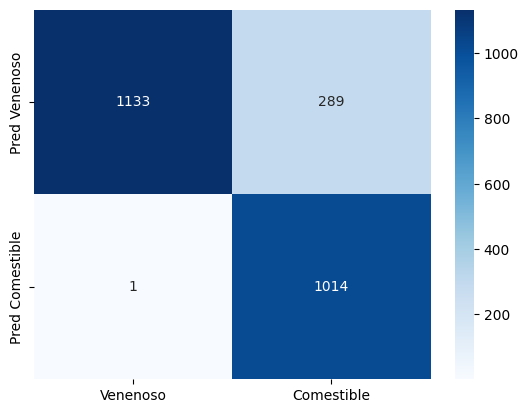

In [ ]:
cm = confusion_matrix(y_test, y_pred_models[5])

tn, fp, fn, tp = cm.ravel()

error_matrix = [[tp, fp], [fn, tn]]

sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Venenoso', 'Comestible'], yticklabels=['Pred Venenoso', 'Pred Comestible'])


### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

> Se asume que las clases se distribuyen con una función de densidad gaussiana multivariada.

b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

> Se asume que la matriz de convarianza es la misma para todas las clases.

c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

> Se entrena el modelo utilizando _LinearDiscriminantAnalysis_ con _n\_componentes=1_, debido a que es el mínimo entre la cantidad de features y clases. Por otra parte, se usa el entrenamiento y test resultantes de usar _MI_ con k=10.

In [ ]:
clf = LinearDiscriminantAnalysis(n_components=1)
clf.fit(X_train_mi[1], y_train)

y_pred = clf.predict(X_test_mi[1])

d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1303
   poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



e) Muestre los errores tipo 1 y tipo 2.

> Generamos nuevamente una matriz de confusión.

<Axes: >

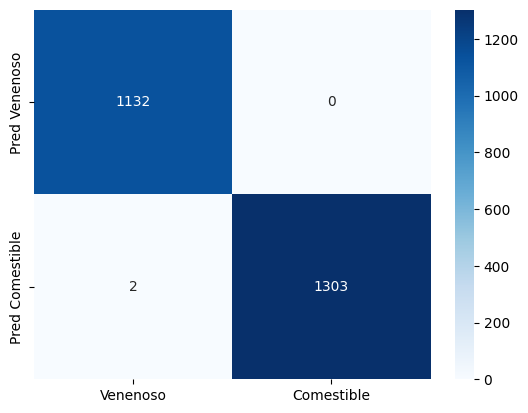

In [ ]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

error_matrix = [[tp, fp], [fn, tn]]

sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Venenoso', 'Comestible'], yticklabels=['Pred Venenoso', 'Pred Comestible'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

> Sirve para estimar el parámetro que tiene una mayor probabilidad de modelar la distribución de un conjunto de datos. Se encuentra maximizando la función de verosimitud (función de densidad conjunta) y en este caso, sirve para estimar β de la función logistica.

b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

> Se asume que la relación entre las variables son independientes.

c) ¿Qué se hace para evitar el sobreajuste de este modelo?

> Uitlizar la regularización de Ridge 'l2' dentro de los parámetros de la función _LogisticRegression_.

d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.
<!-- **Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería. -->

> Se utilizó la librería _LogisticRegression_ probando diversos parámetros, como los tipos de penalización. El mejor resultado fue utilizando penalización de Lasso _l1_, en donde, se debe especificar el solver que se utilizará para resolver el problema. 

In [ ]:
clf = LogisticRegression(C=1, penalty='l1', solver='liblinear', max_iter = 100)
clf.fit(X_train_mi[1], y_train)
y_pred = clf.predict(X_test_mi[1])

e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [ ]:
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1303
   poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



f) Muestre los errores tipo 1 y tipo 2.

<Axes: >

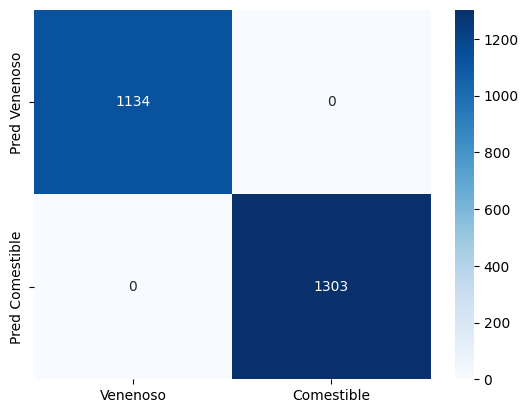

In [ ]:
cm = confusion_matrix(y_test, y_pred)

tn, fp, fn, tp = cm.ravel()

error_matrix = [[tp, fp], [fn, tn]]

sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Venenoso', 'Comestible'], yticklabels=['Pred Venenoso', 'Pred Comestible'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilizaremos los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, se necesita utilizar funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrenaremos un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1, y con los siguientes tipos de _kernel_.

a) Lineal, con 2 valores del coeficiente gamma distintos.

b) Polinómico, con 2 valores del coeficiente gamma distintos.

c) rbf, con 2 valores del coeficiente gamma distintos.

> Para la creación de los modelos se utilizan los siguientes gammas:
* scale: El valor es 1 dividido en la cantidad de features multiplicada por la varianza de las features.
* auto: El valor es 1 dividido por la cantidad de features.

> Se crean los modelos lineales: 

In [ ]:
# Modelo Lineal
clf_l_g1 = NuSVC(kernel='linear', gamma='scale')
clf_l_g1.fit(X_train_mi[1], y_train)
y_pred_l_g1 = clf_l_g1.predict(X_test_mi[1])

clf_l_g2 = NuSVC(kernel='linear', gamma='auto')
clf_l_g2.fit(X_train_mi[1], y_train)
y_pred_l_g2 = clf_l_g2.predict(X_test_mi[1])

> Se crean los modelos polinómicos:




In [ ]:
# Modelo polinómico
clf_p_g1 = NuSVC(kernel='poly', gamma='scale')
clf_p_g1.fit(X_train_mi[1], y_train)
y_pred_p_g1 = clf_p_g1.predict(X_test_mi[1])

clf_p_g2 = NuSVC(kernel='poly', gamma='auto')
clf_p_g2.fit(X_train_mi[1], y_train)
y_pred_p_g2 = clf_p_g2.predict(X_test_mi[1])

> Se crean los modelos rbf:


In [ ]:
# Modelo rbf
clf_r_g1 = NuSVC(kernel='rbf', gamma='scale')
clf_r_g1.fit(X_train_mi[1], y_train)
y_pred_r_g1 = clf_r_g1.predict(X_test_mi[1])

clf_r_g2 = NuSVC(kernel='rbf', gamma='auto')
clf_r_g2.fit(X_train_mi[1], y_train)
y_pred_r_g2 = clf_r_g2.predict(X_test_mi[1])

d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

>Se realiza el reporte de clasificación para los modelos resultantes con kernel Lineal:

In [ ]:
print("Lineal-scale\n")
print(classification_report(y_test, y_pred_l_g1, target_names=['edible', 'poisonous']))
print("Lineal-auto\n")
print(classification_report(y_test, y_pred_l_g2, target_names=['edible', 'poisonous']))

Lineal-scale

              precision    recall  f1-score   support

      edible       0.86      1.00      0.93      1303
   poisonous       1.00      0.82      0.90      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.93      0.92      0.91      2437

Lineal-auto

              precision    recall  f1-score   support

      edible       0.86      1.00      0.93      1303
   poisonous       1.00      0.82      0.90      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.93      0.92      0.91      2437



>Se realiza el reporte de clasificación para los modelos resultantes con kernel Polinómico:

In [ ]:
print("Polinomico-scale\n")
print(classification_report(y_test, y_pred_p_g1, target_names=['edible', 'poisonous']))
print("Polinomico-auto\n")
print(classification_report(y_test, y_pred_p_g2, target_names=['edible', 'poisonous']))

Polinomico-scale

              precision    recall  f1-score   support

      edible       0.88      1.00      0.94      1303
   poisonous       1.00      0.84      0.91      1134

    accuracy                           0.93      2437
   macro avg       0.94      0.92      0.93      2437
weighted avg       0.94      0.93      0.93      2437

Polinomico-auto

              precision    recall  f1-score   support

      edible       0.88      1.00      0.94      1303
   poisonous       1.00      0.84      0.91      1134

    accuracy                           0.93      2437
   macro avg       0.94      0.92      0.93      2437
weighted avg       0.94      0.93      0.93      2437



>Se realiza el reporte de clasificación para los modelos resultantes con kernel rbf:

In [ ]:
print("rbf-scale\n")
print(classification_report(y_test, y_pred_r_g1, target_names=['edible', 'poisonous']))
print("rbf-auto\n")
print(classification_report(y_test, y_pred_r_g2, target_names=['edible', 'poisonous']))

rbf-scale

              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.83      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.94      0.91      0.92      2437
weighted avg       0.93      0.92      0.92      2437

rbf-auto

              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.82      0.90      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.93      0.92      0.92      2437



e) Muestre los errores tipo 1 y tipo 2.

> Se utiliza el modelo polinómico con gamma scale para crear la matriz de confusión, ya que fue el que entrego mejores resultados.

<Axes: >

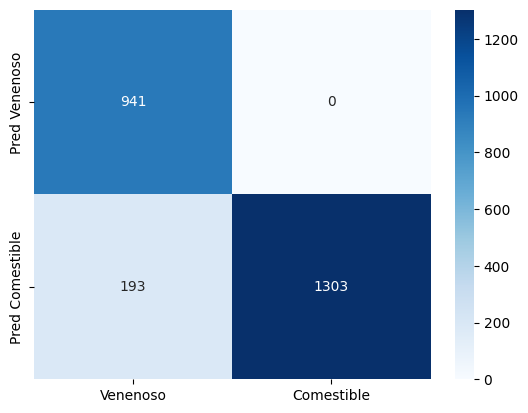

In [ ]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_r_g1)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fp], [fn, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Venenoso', 'Comestible'], yticklabels=['Pred Venenoso', 'Pred Comestible'])

## 2.3 Conclusiones:

> Al comparar los distintos modelos, podemos concluir que el mejor método de feature selection fue MI (10), es decir que 111 - 10 = 101 mejores features (mayor MI), el cual tuvo el mejores métricas de recall, f1-score y accurracy al aplicar Naive Bayes, por lo que se decidió utilizar método como conjunto de entrenamiento y testeo para los futuros modelos:
- Naive Bayes
- LDA
- Regresión Logística
- SVM Super Vertor Machine

> De los modelos anteriores, se observa que las mejores métricas las obtubo la Regresión Logística,  el cual clasificó correctamente todos los datos. Sin embargo:
- LDA también tiene métricas muy cercanas al anterior. donde solo clasificó incorrectamente 2 de los 2437 datos.
- Naive Bayes, similar a LDA, clasificó incorrectamente 10 de los 2437 datos.

> En el caso de SVM, las métricas de accuracy, f1-score y recall disminuyeron signicativamente, cercanos al 0.9, además fue el que tomo más tiempo en realizar el cálculo, entre 7 y 17 segundos.
